## This Notebook gives performs Data Splitting and Resizing of Images (to load in Google Drive - Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Table of Contents**

[Train Validation Split](#section6)<br>
[Resize and save](#section7)<br>
[Image Pre Processing and save](#section8)<br>

In [ ]:
#ref - https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# Basic Libs..
import multiprocessing
from multiprocessing.pool import ThreadPool
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
from prettytable import PrettyTable
import pickle
import os
print('CWD is ',os.getcwd())

# Vis Libs..
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.grid"] = False

# Image Libs.
from PIL import Image
import cv2

# sklearn libs..
from sklearn.model_selection import train_test_split

# DL Libs..
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

CWD is  /content


##  **Train Validation Split**

In [ ]:
'''
This function reads data from the respective train and test directories
'''

def load_data():
    train = pd.read_csv('/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/test.csv')
    
    train_dir = os.path.join('./','/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/train_images')
    test_dir = os.path.join('./','/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/test_images')
    
    train['file_path'] = train['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
    test['file_path'] = test['id_code'].map(lambda x: os.path.join(test_dir,'{}.png'.format(x)))
    
    train['file_name'] = train["id_code"].apply(lambda x: x + ".png")
    test['file_name'] = test["id_code"].apply(lambda x: x + ".png")
    
    train['diagnosis'] = train['diagnosis'].astype(str)
    
    return train,test

In [ ]:
df_train,df_test = load_data()
print(df_train.shape,df_test.shape,'\n')
df_train.head(6)

(3662, 4) (1928, 3) 



,id_code,diagnosis,file_path,file_name
0,000c1434d8d7,2,/content/drive/MyDrive/PROJECTS/Deep learning/...,000c1434d8d7.png
1,001639a390f0,4,/content/drive/MyDrive/PROJECTS/Deep learning/...,001639a390f0.png
2,0024cdab0c1e,1,/content/drive/MyDrive/PROJECTS/Deep learning/...,0024cdab0c1e.png
3,002c21358ce6,0,/content/drive/MyDrive/PROJECTS/Deep learning/...,002c21358ce6.png
4,005b95c28852,0,/content/drive/MyDrive/PROJECTS/Deep learning/...,005b95c28852.png
5,0083ee8054ee,4,/content/drive/MyDrive/PROJECTS/Deep learning/...,0083ee8054ee.png


In [ ]:
df_train_train,df_train_test = train_test_split(df_train,test_size = 0.2)
print(df_train_train.shape,df_train_test.shape)

(2929, 4) (733, 4)


In [ ]:
'''This Function Plots a Bar plot of output Classes Distribution'''

def plot_classes(df,title):
    df_group = pd.DataFrame(df.groupby('diagnosis').agg('size').reset_index())
    df_group.columns = ['diagnosis','count']

    sns.set(rc={'figure.figsize':(10,5)}, style = 'whitegrid')
    sns.barplot(x = 'diagnosis',y='count',data = df_group,palette = "Blues_d")
    plt.title('Output Class Distribution ' + str(title))
    plt.show() 

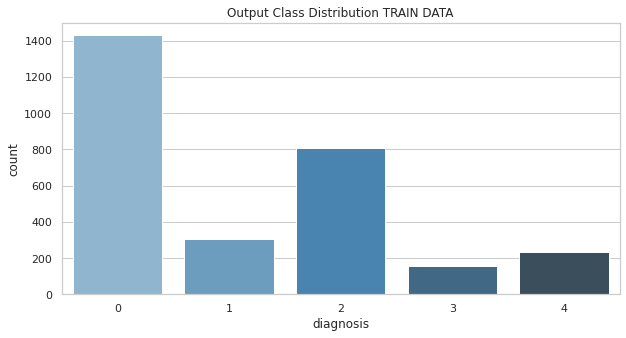

In [ ]:
plot_classes(df_train_train,"TRAIN DATA")

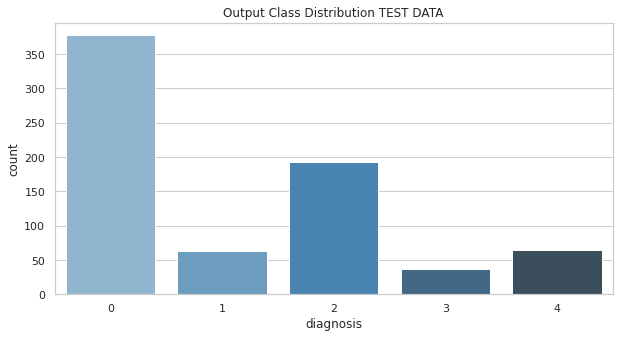

In [ ]:
plot_classes(df_train_test,'TEST DATA')

In [ ]:

file = open('/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/df_train_train', 'wb')
pickle.dump(df_train_train, file)
file.close()

file = open('/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/df_train_test', 'wb')
pickle.dump(df_train_test, file)
file.close()


In [ ]:
file = open('/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/df_train_train', 'rb')
df_train_train = pickle.load(file)
file.close()

file = open('/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/df_train_test', 'rb')
df_train_test = pickle.load(file)
file.close()

In [ ]:
print(df_train_train.shape,df_train_test.shape)
#print(len(os.listdir('./train_images_resized_preprocessed')),len(os.listdir('./valid_images_resized_preprocessed')))

## **Resize and Save**

In [ ]:
IMG_SIZE  = 512

In [ ]:
'''Function loads an image from Folder , Resizes and saves in another directory '''

def image_resize_save(file):
    input_filepath = os.path.join('./','/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/train_images','{}.png'.format(file))
    output_filepath = os.path.join('./','/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/train_images_resized_preprocessed','{}.png'.format(file))
    img = cv2.imread(input_filepath)
    img = circle_crop(img) 
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))
#image_resize_save(df_train.id_code.iloc[201])

In [ ]:
'''This Function uses Multi processing for faster saving of images into folder'''

def multiprocess_image_downloader(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
    print(f'MESSAGE: Running {process} process')
    results = ThreadPool(process).map(image_resize_save, imgs)
    return results

In [ ]:
# Use 6 cores
multiprocess_image_downloader(6, list(df_train_train.id_code.values))

MESSAGE: Running 6 process


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

##### Summary - Using Multiprocessing (6 cores), we managed to resize and save images within 10 minutes, and reducing IMG_SIZE to 512, thereby reducing disk-space from 20 GB (earlier) to 1 GB (after resizing). We shall load data into colab and start training models

##  **Image Pre Processing and save**

In [ ]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

def circle_crop(img, sigmaX = 30):   
    """
    Create circular crop around image centre    
    """    
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

def preprocess_image(file):
    input_filepath = os.path.join('./','/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/train_images','{}.png'.format(file))
    output_filepath = os.path.join('./','/content/drive/MyDrive/PROJECTS/Deep learning/Diabetic retinopathy detection/dataset/aptos2019-blindness-detection/test_images_resized_preprocessed','{}.png'.format(file))
    
    img = cv2.imread(input_filepath)
    img = circle_crop(img) 
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))


In [ ]:
'''This Function uses Multi processing for faster saving of images into folder'''

def multiprocess_image_processor(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
   # print(imgs)
    print(f'MESSAGE: Running {process} process')
    results = ThreadPool(process).map(preprocess_image, imgs)
    return results

In [ ]:
# Use 6 cores
multiprocess_image_processor(6, list(df_train_test.id_code.values))

MESSAGE: Running 6 process


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,